In [1]:
from src.data.components.helsinki import HelsinkiProminenceExtractor

import numpy as np

/opt/homebrew/Caskroom/miniforge/base/envs/prosody/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root_dir = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/data/Helsinki"
filename = "dev.txt"

helsinki = HelsinkiProminenceExtractor(root_dir, filename)

In [3]:
all_texts = helsinki.get_all_texts()

In [17]:
all_discrete_prominence = helsinki.get_all_discrete_prominence(classes=2)
all_real_prominences = helsinki.get_all_real_prominence()

### Discrete Entropy

In [23]:
flattened_discrete_prominence = [
    item for sublist in all_discrete_prominence for item in sublist
]
unique, counts = np.unique(flattened_discrete_prominence, return_counts=True)
print(dict(zip(unique, counts)))

# print probability of prominence
print(counts[1] / (counts[0] + counts[1]))

{0: 47529, 1: 51655}
0.5207997257622197


In [24]:
# compute the empirical entropy over the prominence labels
from scipy.stats import entropy

entropy(
    [
        counts[0] / len(flattened_discrete_prominence),
        counts[1] / len(flattened_discrete_prominence),
    ]
)

0.6922816736468088

### Real Entropy

In [36]:
flattened_real_prominence = [
    item for sublist in all_real_prominences for item in sublist
]
print(np.mean(flattened_real_prominence))
print(np.std(flattened_real_prominence))

0.7312105884013551
0.7908271423950076


In [39]:
from scipy.stats import differential_entropy

differential_entropy(flattened_real_prominence, method="auto")

/opt/homebrew/Caskroom/miniforge/base/envs/prosody/lib/python3.9/site-packages/scipy/stats/_entropy.py:352: RuntimeWarning: divide by zero encountered in log
  logs = np.log(n/(2*m) * differences)


-inf

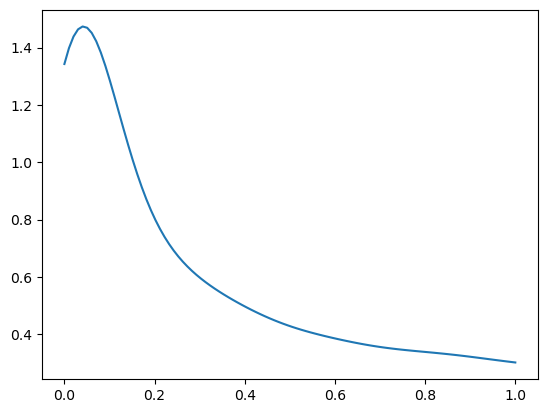

In [47]:
# compute kde of prominence values

from scipy.stats import gaussian_kde

kde = gaussian_kde(flattened_real_prominence)

import matplotlib.pyplot as plt

x = np.linspace(0, 1, 100)
plt.plot(x, kde(x))